In [ ]:
#Data Analysis Project Using Python
#1) What type of restaurant do the majority of customers order from?
#2) How many votes has each type of restaurant received from customers?
#3) What are the ratings that the majority of restaurants have received?
#4)Zomato has observed that most couples order most of their food online. What is their average spending on each order?
#5) Which mode (online or offline) has received the maximum rating?
#6) Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df= pd.read_csv('Zomato data .csv')
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [3]:
#convert rate to flot
df['rate']=df['rate'].str.split('/').str.get(0).astype(float)

In [4]:
#data type
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

Text(0.5, 0, 'Type on Resturents')

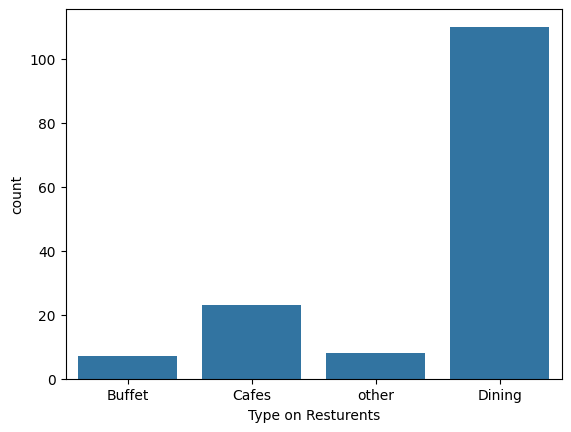

In [5]:
#the majority of customers
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type on Resturents')

In [6]:
#Majority of restaurants have received in Dining=110,Cafes=23,Buffet=7,other=8

Dining=df[df['listed_in(type)']=='Dining'].shape[0]
Cafes=df[df['listed_in(type)']=='Cafes'].shape[0]
Buffet=df[df['listed_in(type)']=='Buffet'].shape[0]
other=df[df['listed_in(type)']=='other'].shape[0]
print('Majority of restaurants have received in hight-low:-',Dining,Cafes,other,Buffet)

Majority of restaurants have received in hight-low:- 110 23 8 7


In [8]:
#Majority of restaurants have received
Max_reting=df[df['rate']==df['rate'].max()]
Max_reting

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
44,Onesta,Yes,Yes,4.6,2556,600,other


Text(0, 0.5, 'Votes')

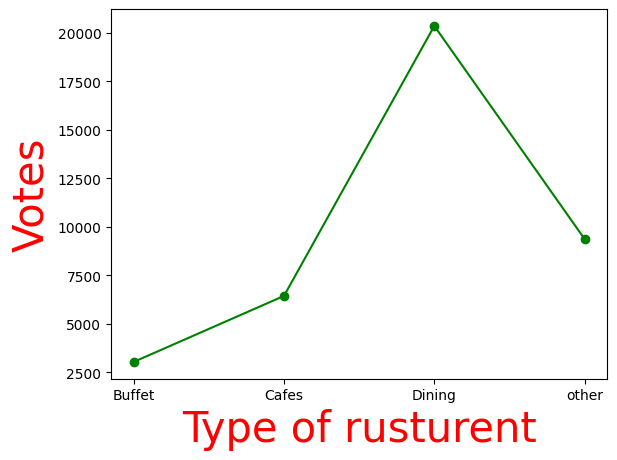

In [9]:
#votes has each type of restaurant received
grouped=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped})
plt.plot(result, c="green",marker="o")
plt.xlabel("Type of rusturent",c="red",size=30)
plt.ylabel("Votes",c="red",size=30)

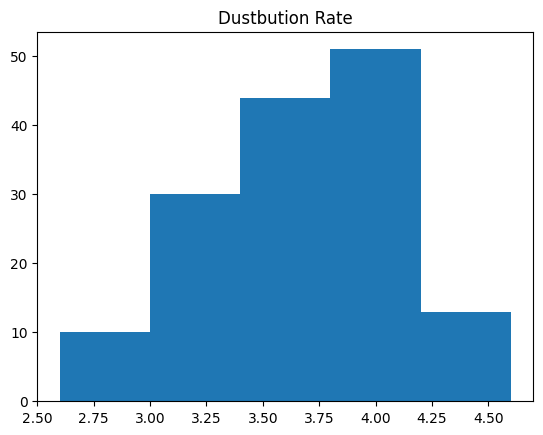

In [10]:
#ratings that the majority of restaurants
plt.hist(df['rate'],bins=5)
plt.title('Dustbution Rate')
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

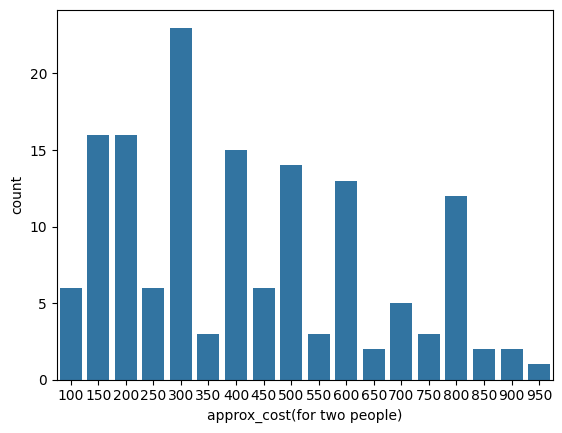

In [11]:
# couples order most of their food online
cuple_data =df['approx_cost(for two people)']
sns.countplot(x=cuple_data)

In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Rating')

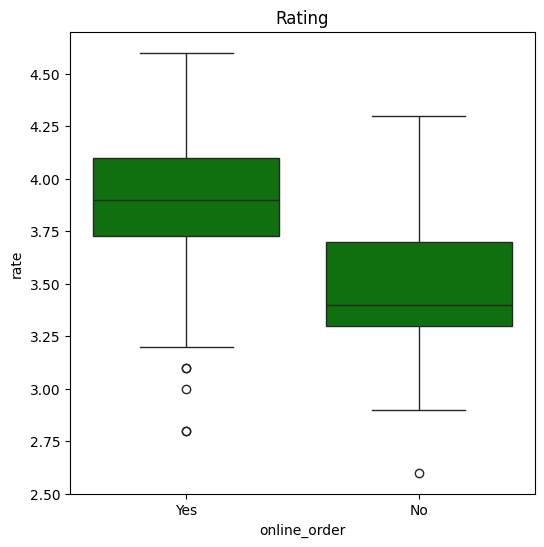

In [13]:
# (online or offline) has received the maximum rating
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',color='green', data= df)
plt.title("Rating")

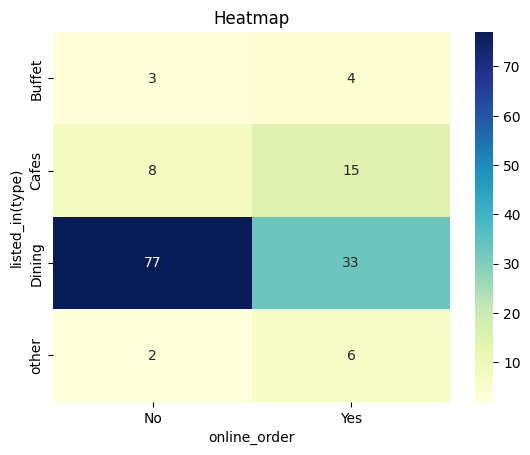

In [14]:
#restaurant received more offline orders
pivot = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()

In [15]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining
